# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
mars_soup = soup(html, 'html.parser')

In [5]:
# Extract all rows of data
table = mars_soup.find('table', class_='table')
rows_head= table.find_all('th')
row_data = table.find_all('td')

In [29]:
rows_head

[<th>id</th>,
 <th>terrestrial_date</th>,
 <th>sol</th>,
 <th>ls</th>,
 <th>month</th>,
 <th>min_temp</th>,
 <th>pressure</th>]

In [7]:
row_data

[<td>2</td>,
 <td>2012-08-16</td>,
 <td>10</td>,
 <td>155</td>,
 <td>6</td>,
 <td>-75.0</td>,
 <td>739.0</td>,
 <td>13</td>,
 <td>2012-08-17</td>,
 <td>11</td>,
 <td>156</td>,
 <td>6</td>,
 <td>-76.0</td>,
 <td>740.0</td>,
 <td>24</td>,
 <td>2012-08-18</td>,
 <td>12</td>,
 <td>156</td>,
 <td>6</td>,
 <td>-76.0</td>,
 <td>741.0</td>,
 <td>35</td>,
 <td>2012-08-19</td>,
 <td>13</td>,
 <td>157</td>,
 <td>6</td>,
 <td>-74.0</td>,
 <td>732.0</td>,
 <td>46</td>,
 <td>2012-08-20</td>,
 <td>14</td>,
 <td>157</td>,
 <td>6</td>,
 <td>-74.0</td>,
 <td>740.0</td>,
 <td>57</td>,
 <td>2012-08-21</td>,
 <td>15</td>,
 <td>158</td>,
 <td>6</td>,
 <td>-78.0</td>,
 <td>740.0</td>,
 <td>68</td>,
 <td>2012-08-22</td>,
 <td>16</td>,
 <td>158</td>,
 <td>6</td>,
 <td>-77.0</td>,
 <td>740.0</td>,
 <td>79</td>,
 <td>2012-08-23</td>,
 <td>17</td>,
 <td>159</td>,
 <td>6</td>,
 <td>-76.0</td>,
 <td>742.0</td>,
 <td>112</td>,
 <td>2012-08-27</td>,
 <td>21</td>,
 <td>161</td>,
 <td>6</td>,
 <td>-74.0</td>,
 <td>741.

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [37]:
# Extract all rows of data
# Find the table element containing the data
table = mars_soup.find('table',class_='table')
apple=[]
pinapple =[]
# Extract all rows from the table
rows = table.find_all('tr')

# Iterate through each row and print its contents
for row in rows:
    # Extract data from each cell in the row
    cells = row.find_all('td')
    row_data_t = [cell.text.strip() for cell in cells]
    apple.append(row_data_t)

        # Print row data
    print(row_data_t)
for row in rows_head:
    pinapple.append(row.text)
    

[]
['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']
['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']
['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']
['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']
['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0']
['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0']
['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0']
['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0']
['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0']
['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0']
['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0']
['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0']
['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0']
['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0']
['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0']
['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0']
['172', '2012-09-05'

In [35]:
pinapple

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [16]:
data_list

['2',
 '13',
 '24',
 '35',
 '46',
 '57',
 '68',
 '79',
 '112',
 '114',
 '123',
 '134',
 '145',
 '156',
 '163',
 '170',
 '171',
 '172',
 '173',
 '175',
 '176',
 '177',
 '178',
 '179',
 '180',
 '181',
 '182',
 '183',
 '184',
 '185',
 '186',
 '187',
 '188',
 '189',
 '190',
 '191',
 '192',
 '193',
 '194',
 '195',
 '196',
 '197',
 '198',
 '199',
 '200',
 '201',
 '202',
 '203',
 '204',
 '205',
 '206',
 '207',
 '208',
 '209',
 '210',
 '211',
 '212',
 '213',
 '214',
 '215',
 '216',
 '217',
 '218',
 '219',
 '220',
 '221',
 '222',
 '223',
 '224',
 '225',
 '226',
 '227',
 '228',
 '229',
 '230',
 '231',
 '233',
 '234',
 '235',
 '236',
 '237',
 '238',
 '239',
 '240',
 '241',
 '242',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',

In [40]:
apple.insert(0,pinapple)

In [45]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(apple)
# Delete the row with integer index 3
df.drop(1, inplace=True)
# Set the values in the first row as column headers
df.columns = df.iloc[0]

# Drop the first row (since it's now the column headers)
df = df[1:]

# Reset the index
df.reset_index(drop=True, inplace=True)



In [46]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [18]:
header_list

['id']

### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [47]:
# Examine data type of each column
print(df.dtypes)

0
id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [48]:
# Change data types for data analysis
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

# Convert 'sol', 'ls', and 'month' columns to integer type
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(int)
df['month'] = df['month'].astype(int)

# Convert 'min_temp' and 'pressure' columns to float type
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)


In [49]:
# Confirm type changes were successful by examining data types again
print(df.dtypes)

0
id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [60]:
# 1. How many months are there on Mars?
num_months = df['month'].nunique()
num_months

12

In [50]:
# 2. How many Martian days' worth of data are there?


In [61]:
# 3. What is the average low temperature by month?
average_low_temp_by_month = df.groupby('month')['min_temp'].mean()
average_low_temp_by_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

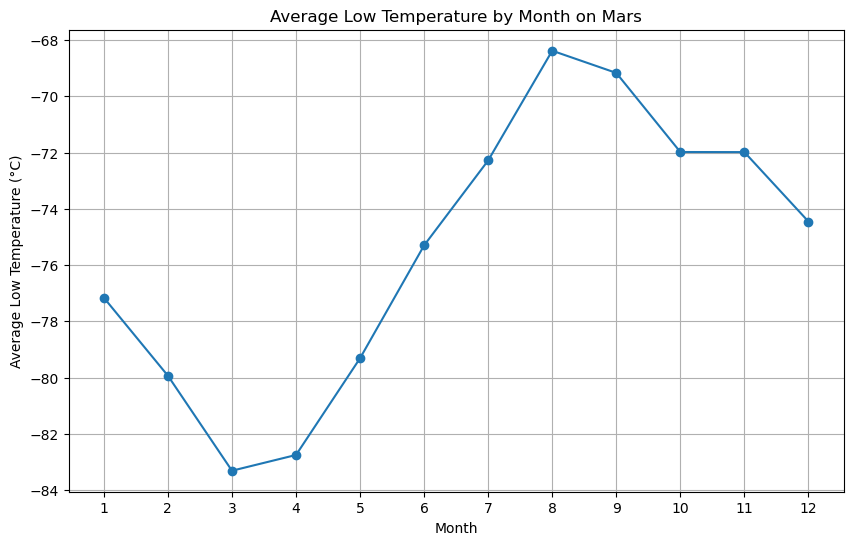

In [52]:
# Plot the average temperature by month
# Plot the average temperature by month
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(average_low_temp_by_month.index, average_low_temp_by_month.values, marker='o', linestyle='-')  # Plot the data
plt.xlabel('Month')  # Set the x-axis label
plt.ylabel('Average Low Temperature (°C)')  # Set the y-axis label
plt.title('Average Low Temperature by Month on Mars')  # Set the title
plt.xticks(range(1, 13))  # Set the x-axis ticks to correspond to months
plt.grid(True)  # Show grid
plt.show()  # Display the plot

In [62]:
# Identify the coldest and hottest months in Curiosity's location
# Find the coldest month (month with the lowest average low temperature)
coldest_month = average_low_temp_by_month.idxmin()
coldest_temp = average_low_temp_by_month.min()
print('the coldest month is ' coldest_month ' and its ' coldest_temp)

# Find the hottest month (month with the highest average low temperature)
hottest_month = average_low_temp_by_month.idxmax()
hottest_temp = average_low_temp_by_month.max()
print('the hottest month is ' hottest_month ' and its ' hottest_temp)


SyntaxError: invalid syntax. Perhaps you forgot a comma? (1433249605.py, line 5)

In [54]:
# 4. Average pressure by Martian month
average_pressure_by_month = df.groupby('month')['pressure'].mean()

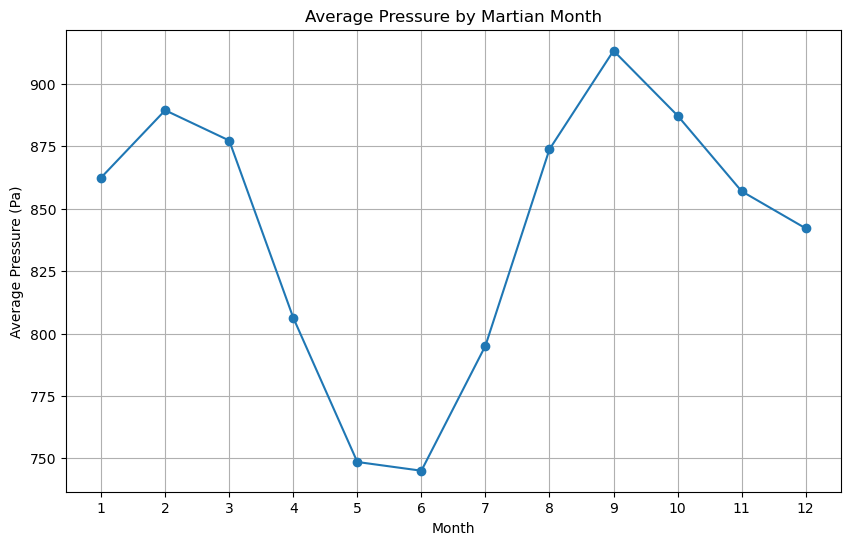

In [55]:
# Plot the average pressure by month
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(average_pressure_by_month.index, average_pressure_by_month.values, marker='o', linestyle='-')  # Plot the data
plt.xlabel('Month')  # Set the x-axis label
plt.ylabel('Average Pressure (Pa)')  # Set the y-axis label
plt.title('Average Pressure by Martian Month')  # Set the title
plt.xticks(range(1, 13))  # Set the x-axis ticks to correspond to months
plt.grid(True)  # Show grid
plt.show()  # Display the plot


In [57]:
# 5. How many terrestrial (earth) days are there in a Martian year?
martian_year = 687  # Martian year (in Earth days)
earth_days_per_martian_day = 1.027491252  # Earth days in one Martian day

# Calculate the number of Earth days in a Martian year
earth_days_in_martian_year = martian_year * earth_days_per_martian_day



On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [58]:
# Write the data to a CSV
average_pressure_by_month.to_csv('average_pressure_by_month.csv', header=['Average Pressure (Pa)'])


In [59]:
browser.quit()